Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
)

from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

import optuna

from imblearn.over_sampling import SMOTE

import joblib
from pathlib import Path


In [2]:
#preprocessed database path
df_save_path=Path.cwd().parent/"data"/"processed_telco_churn.csv"
df=pd.read_csv(df_save_path)
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Paperless Billing,MonthlyCharges,TotalCharges,Multiple Lines_No phone service_False,...,Contract_Two year_False,Contract_Two year_True,Payment Method_Credit card (automatic)_False,Payment Method_Credit card (automatic)_True,Payment Method_Electronic check_False,Payment Method_Electronic check_True,Payment Method_Mailed check_False,Payment Method_Mailed check_True,tenure_bucket,churn_label
0,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,1,0,1,0,1,0,0,1,0,1
1,0,0,0,1,-1.239504,1,1,0.196178,-0.940457,1,...,1,0,1,0,0,1,1,0,0,1
2,0,0,0,1,-0.995040,1,1,1.158489,-0.645369,1,...,1,0,1,0,0,1,1,0,0,1
3,0,0,1,1,-0.180161,1,1,1.329677,0.336516,1,...,1,0,1,0,0,1,1,0,2,1
4,1,0,0,1,0.675462,1,1,1.293113,1.214589,1,...,1,0,1,0,1,0,1,0,3,1


In [4]:
#target is churn_label
X=df.drop("churn_label", axis=1)
y=df["churn_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [79]:
model_features_path=Path.cwd().parent/"models"/"model_features.pkl"
joblib.dump(X_train.columns.tolist(), model_features_path)

['d:\\personalCode\\churn-prediction\\models\\model_features.pkl']

In [78]:
X_test.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Paperless Billing,MonthlyCharges,TotalCharges,Multiple Lines_No phone service_False,...,Contract_One year_True,Contract_Two year_False,Contract_Two year_True,Payment Method_Credit card (automatic)_False,Payment Method_Credit card (automatic)_True,Payment Method_Electronic check_False,Payment Method_Electronic check_True,Payment Method_Mailed check_False,Payment Method_Mailed check_True,tenure_bucket
2592,0,0,1,0,1.082902,1,1,0.370691,0.996664,1,...,0,0,1,0,1,1,0,1,0,3
2336,0,0,0,0,-1.035784,1,1,0.457116,-0.776645,1,...,0,1,0,1,0,1,0,1,0,0
5025,0,0,0,0,0.879182,1,0,-1.485788,-0.531124,1,...,0,0,1,1,0,1,0,0,1,3
975,0,0,0,0,-1.239504,1,0,-1.467506,-0.990290,1,...,0,1,0,1,0,1,0,0,1,0
5204,0,0,1,0,1.571829,1,1,1.341311,2.325808,1,...,0,0,1,1,0,1,0,1,0,4


Initialising XGBoost

In [ ]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    device="cuda",
    random_state=42
)

In [9]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [10]:
y_pred=xgb.predict(X_test)

In [12]:
y_proba = xgb.predict_proba(X_test)[:, 1] 

In [14]:
accuracy=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_proba)

print(f"Accuracy; {accuracy: .4f}")
print(f"F1-score; {f1: .4f}")
print(f"ROC-AUC; {roc_auc: .4f}")
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy;  0.7797
F1-score;  0.5670
ROC-AUC;  0.8299

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.59      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [43]:
def objective(trial):
    param={
        'objective':'binary:logistic',
        'eval_metric':'logloss',
        'use_label_encoder':False,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 2),
        'random_state': 42,
        'use_label_encoder': False,
        'device': "cuda"
    }

    model=XGBClassifier(**param)

    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores=cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    return scores.mean()

study=optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best trial: ")
trial=study.best_trial
print(trial.params)

[I 2025-05-18 10:37:34,329] A new study created in memory with name: no-name-8739b66d-61f1-409c-ad4d-4093722fdc10
[I 2025-05-18 10:37:36,304] Trial 0 finished with value: 0.6130965554079394 and parameters: {'learning_rate': 0.059156329054587925, 'max_depth': 9, 'n_estimators': 452, 'subsample': 0.8359415462894333, 'colsample_bytree': 0.8707679286915528, 'gamma': 4.049484433022473, 'reg_alpha': 0.3082876691162687, 'reg_lambda': 1.342060752043626}. Best is trial 0 with value: 0.6130965554079394.
[I 2025-05-18 10:37:37,710] Trial 1 finished with value: 0.610926985383093 and parameters: {'learning_rate': 0.03709978341826744, 'max_depth': 4, 'n_estimators': 318, 'subsample': 0.6508641585539645, 'colsample_bytree': 0.9144212742154466, 'gamma': 4.286198065279314, 'reg_alpha': 0.189692702208342, 'reg_lambda': 1.8785356927789447}. Best is trial 0 with value: 0.6130965554079394.
[I 2025-05-18 10:37:39,773] Trial 2 finished with value: 0.6036237838707775 and parameters: {'learning_rate': 0.014014

Best trial: 
{'learning_rate': 0.08416742096484756, 'max_depth': 5, 'n_estimators': 469, 'subsample': 0.595278545595342, 'colsample_bytree': 0.6175700264433641, 'gamma': 3.704259936350354, 'reg_alpha': 0.7140742157389178, 'reg_lambda': 1.1558743078897962}


In [51]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    learning_rate=0.08416742096484756,
    max_depth=5,
    n_estimators=469,
    subsample= 0.595278545595342,
    colsample_bytree=0.6175700264433641,
    gamma=3.704259936350354,
    reg_alpha=0.7140742157389178,
    reg_lambda=1.1558743078897962,
    device="cuda",
    random_state=42
)

In [52]:
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1] 

accuracy=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
roc_auc=roc_auc_score(y_test, y_proba)

print(f"Accuracy; {accuracy: .4f}")
print(f"F1-score; {f1: .4f}")
print(f"ROC-AUC; {roc_auc: .4f}")
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy;  0.8024
F1-score;  0.6128
ROC-AUC;  0.8496

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1033
           1       0.64      0.59      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



try to improve scores later <3

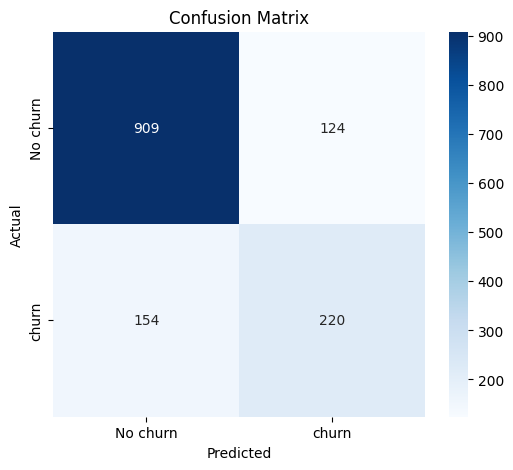

In [53]:
cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
smote = SMOTE(sampling_strategy=0.73, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [54]:
def objective(trial):
    param={
        'objective':'binary:logistic',
        'eval_metric':'logloss',
        'use_label_encoder':False,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 2),
        'random_state': 42,
        'use_label_encoder': False,
        'device': "cuda"
    }

    model=XGBClassifier(**param)

    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores=cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')
    return scores.mean()

study=optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best trial: ")
trial=study.best_trial
print(trial.params)

[I 2025-05-18 11:36:37,781] A new study created in memory with name: no-name-9587ea76-0837-4b95-9589-4b11d4272cef
[I 2025-05-18 11:36:40,187] Trial 0 finished with value: 0.8044063726425338 and parameters: {'learning_rate': 0.06824452445859097, 'max_depth': 6, 'n_estimators': 240, 'subsample': 0.6731707516815117, 'colsample_bytree': 0.5549423328112959, 'gamma': 0.5032238176486326, 'reg_alpha': 0.05493156489942408, 'reg_lambda': 1.984037598570642}. Best is trial 0 with value: 0.8044063726425338.
[I 2025-05-18 11:36:42,076] Trial 1 finished with value: 0.7771188679719998 and parameters: {'learning_rate': 0.011166549406385059, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.775317067198302, 'colsample_bytree': 0.7432160328653826, 'gamma': 1.942828692661121, 'reg_alpha': 0.971421343878328, 'reg_lambda': 0.9071808088731039}. Best is trial 0 with value: 0.8044063726425338.
[I 2025-05-18 11:36:43,289] Trial 2 finished with value: 0.798186460151681 and parameters: {'learning_rate': 0.18369

Best trial: 
{'learning_rate': 0.06801509722861719, 'max_depth': 9, 'n_estimators': 207, 'subsample': 0.5170175963097371, 'colsample_bytree': 0.5001039364979775, 'gamma': 0.2209662098447115, 'reg_alpha': 0.24026324779683828, 'reg_lambda': 1.663360733393072}


In [66]:
# 2. Train XGBoost on resampled data
xgb_smote = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    learning_rate=0.09423988353764122,
    max_depth=4,
    n_estimators=227,
    subsample=0.7510280011101731,
    colsample_bytree= 0.7645977574980288,
    gamma=1.3386893470230095,
    reg_alpha=0.954715000010483,
    reg_lambda=0.9214847598660335,
    device="cuda",
    random_state=42,
)

xgb_smote.fit(X_train_resampled, y_train_resampled)

# 3. Predict on the original test set
y_pred_smote = xgb_smote.predict(X_test)
y_proba_smote = xgb_smote.predict_proba(X_test)[:, 1]

# 4. Evaluate
print("Accuracy; ", round(accuracy_score(y_test, y_pred_smote), 4))
print("F1-score; ", round(f1_score(y_test, y_pred_smote), 4))
print("ROC-AUC; ", round(roc_auc_score(y_test, y_proba_smote), 4))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

Accuracy;  0.7811
F1-score;  0.6216
ROC-AUC;  0.8358

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.78      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



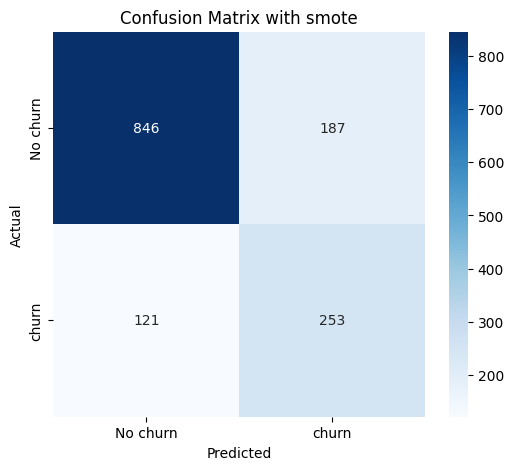

In [72]:
cm_smote=confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_smote, annot=True, fmt='d',cmap='Blues', xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with smote')
plt.show()

Instead of SMOTE, using scale_pos_weight instead

In [55]:
def objective(trial):
    scale_pos_weight=(y_train==0).sum()/(y_train==1).sum()
    param={
        'objective':'binary:logistic',
        'eval_metric':'logloss',
        'use_label_encoder':False,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 2),
        'random_state': 42,
        'use_label_encoder': False,
        'device': "cuda",
        'scale_pos_weight': scale_pos_weight
    }

    model=XGBClassifier(**param)

    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores=cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    return scores.mean()

study=optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best trial: ")
trial=study.best_trial
print(trial.params)

[I 2025-05-18 11:44:27,173] A new study created in memory with name: no-name-d11293cb-7179-4727-947e-3b49ea24b08b
[I 2025-05-18 11:44:28,717] Trial 0 finished with value: 0.6504092138951573 and parameters: {'learning_rate': 0.08178405421663075, 'max_depth': 3, 'n_estimators': 174, 'subsample': 0.7717041418771493, 'colsample_bytree': 0.5170883622732876, 'gamma': 1.3234181584876676, 'reg_alpha': 0.4154488380012218, 'reg_lambda': 1.1671077473028513}. Best is trial 0 with value: 0.6504092138951573.
[I 2025-05-18 11:44:30,093] Trial 1 finished with value: 0.6543741624511287 and parameters: {'learning_rate': 0.045120697806881334, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.85174836291681, 'colsample_bytree': 0.9123641090516544, 'gamma': 4.192834913099058, 'reg_alpha': 0.7164670542395594, 'reg_lambda': 0.7807373564301553}. Best is trial 1 with value: 0.6543741624511287.
[I 2025-05-18 11:44:31,966] Trial 2 finished with value: 0.6547895169232044 and parameters: {'learning_rate': 0.0290

Best trial: 
{'learning_rate': 0.012913478559631358, 'max_depth': 10, 'n_estimators': 253, 'subsample': 0.5411762468648477, 'colsample_bytree': 0.5553294394714078, 'gamma': 1.6717005335384525, 'reg_alpha': 0.7190937046179001, 'reg_lambda': 1.3537335450224492}


In [63]:
scaled_pos_weight=(y_train==0).sum()/(y_train==1).sum()

xgb_pos_scaled = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    learning_rate=0.012913478559631358,
    max_depth=10,
    n_estimators=253,
    subsample= 0.5411762468648477,
    colsample_bytree=0.5553294394714078,
    gamma=1.6717005335384525,
    reg_alpha=0.7190937046179001,
    reg_lambda=1.3537335450224492,
    device="cuda",
    random_state=42,
    scale_pos_weight=scaled_pos_weight
)

In [69]:
xgb_pos_scaled.fit(X_train, y_train)
y_pred_scaled=xgb_pos_scaled.predict(X_test)
y_proba_scaled = xgb_pos_scaled.predict_proba(X_test)[:, 1] 

accuracy=accuracy_score(y_test, y_pred_scaled)
f1=f1_score(y_test, y_pred_scaled)
roc_auc=roc_auc_score(y_test, y_proba_scaled)

print(f"Accuracy; {accuracy: .4f}")
print(f"F1-score; {f1: .4f}")
print(f"ROC-AUC; {roc_auc: .4f}")
print("\nClassification Report with pos scaling: \n", classification_report(y_test, y_pred_scaled))

Accuracy;  0.7541
F1-score;  0.6263
ROC-AUC;  0.8453

Classification Report with pos scaling: 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.78      0.63       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



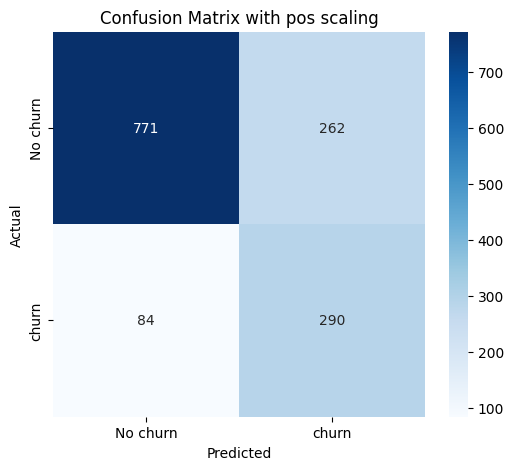

In [70]:
cm_pos_scaled=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_pos_scaled, annot=True, fmt='d',cmap='Blues', xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with pos scaling')
plt.show()

In [71]:
results = [
    {
        "Model": "XGBoost + SMOTE",
        "Accuracy": accuracy_score(y_test, y_pred_smote),
        "Precision": precision_score(y_test, y_pred_smote),
        "Recall": recall_score(y_test, y_pred_smote),
        "F1 Score": f1_score(y_test, y_pred_smote),
        "ROC AUC": roc_auc_score(y_test, y_proba_smote)
    },
    {
        "Model": "XGBoost + scale_pos_weight",
        "Accuracy": accuracy_score(y_test, y_pred_scaled),
        "Precision": precision_score(y_test, y_pred_scaled),
        "Recall": recall_score(y_test, y_pred_scaled),
        "F1 Score": f1_score(y_test, y_pred_scaled),
        "ROC AUC": roc_auc_score(y_test, y_proba_scaled)
    }
]

# Convert to DataFrame
df_results = pd.DataFrame(results)
df_results = df_results.round(4)

print(df_results)

                        Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0             XGBoost + SMOTE    0.7811     0.5750  0.6765    0.6216   0.8358
1  XGBoost + scale_pos_weight    0.7541     0.5254  0.7754    0.6263   0.8453


Saving scaled_pos xgb model

In [76]:
model_path = Path.cwd().parent / "models" / "xgb_scaled_model.pkl"
joblib.dump(xgb_smote, "D:\\personalCode\\churn-prediction\\models\\xgb_scaled_pos_model.pkl")

['D:\\personalCode\\churn-prediction\\models\\xgb_scaled_pos_model.pkl']